<h1>How alcohol affects study<h1>

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import plotly.express as px

In [224]:
df = pd.read_csv('/Users/yana/Desktop/Maths.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [225]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<h2>Let's check if dataframe has any NaN:<h2>

In [412]:
df.isnull().sum().sum()

0

<h2>Let's output some statistics<h2>

In [229]:
print(df['G1'].describe())
print(df['G1'].median())

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64
11.0


In [230]:
print(df['G2'].describe())
print(df['G2'].median())

count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64
11.0


In [231]:
print(df['G3'].describe())
print(df['G3'].median())

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64
11.0


In [232]:
print(df['Dalc'].describe())
print(df['Dalc'].median())

count    395.000000
mean       1.481013
std        0.890741
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Dalc, dtype: float64
1.0


In [233]:
print(df['Walc'].describe())
print(df['Walc'].median())

count    395.000000
mean       2.291139
std        1.287897
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Walc, dtype: float64
2.0


<h3>First of all, let us consider the dependence of the final grade on the grades for the 1st and 2nd periods of study<h3>

In [235]:
sns.set_palette('vlag') 

0.8014679320174141


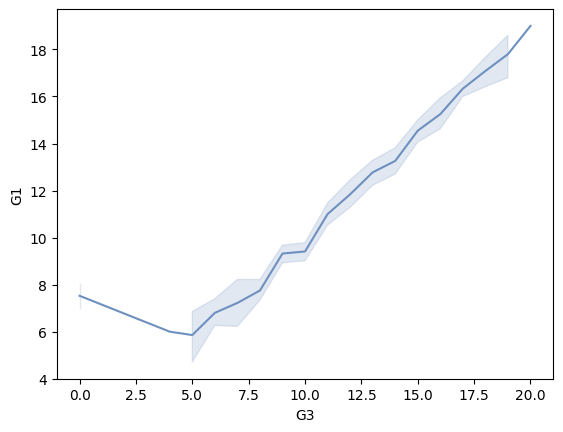

In [403]:
df['G3'] = df['G3'].astype('int')
sns.lineplot(x="G3", 
             y="G1", 
             data=df)
print(df['G3'].corr(df['G1']))

0.9048679892693013


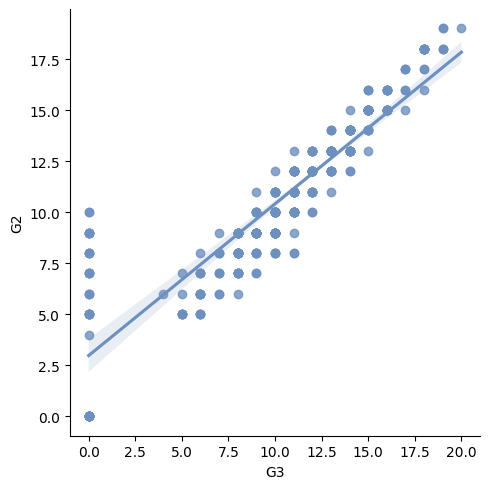

In [352]:
df['G3'] = df['G3'].astype('int')
sns.lmplot(x="G3", 
             y="G2", 
             data=df)
print(df['G3'].corr(df['G2']))

<h3>As we can see, the final grade is highly correlated from Period 1 and Period 2 grades<h3>

<h3>Let's find the difference between the first period grade and the last one by creating a new column<h3>

In [240]:
df['change'] = df['G3'] - df['G1']

In [241]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,change
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,2
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,-3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,-1


0.02248323377244775


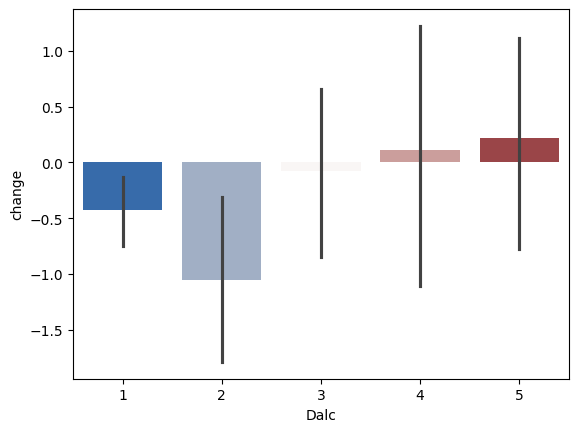

In [395]:
sns.barplot(data=df, 
            x="Dalc", 
            y="change", 
            hue="Dalc", 
            palette="vlag", 
            legend=False)
print(df['Dalc'].corr(df['change']))

0.06546878680558797


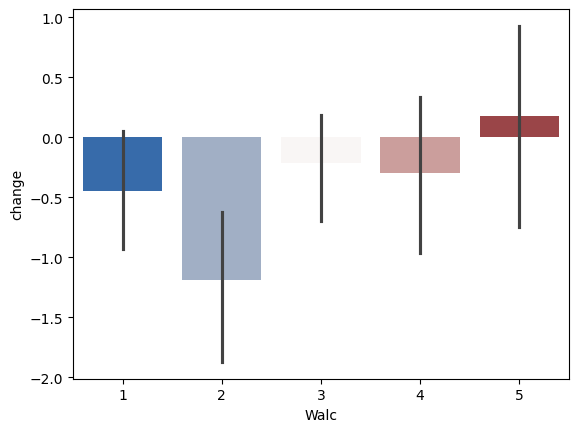

In [416]:
sns.barplot(data=df, 
            x="Walc", 
            y="change", 
            hue="Walc", 
            palette="vlag", 
            legend=False)
print(df['Walc'].corr(df['change']))

<h3>As we can see, the student with the lowest alcohol consumption see the biggest drop in their grades. But the correlation is very small<h3>

<h3>Let's find the average alcohol consumption by creating a new column<h3>

In [276]:
df['avalc'] = (df['Dalc'] + df['Walc']) / 2

<h1>Hypothesis:<h1>
<h3>The first hypothesis:<h3>
<h3>Alcohol consumption is higher among men, but it doesn't affect school grades. And I want to check it<h3>

<h3>Let's look at the relationship of school grades to the amount of alcohol consumed among males and females<h3>

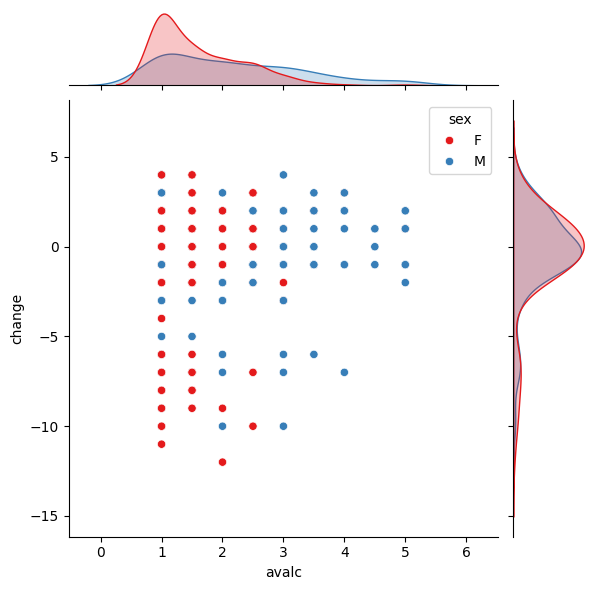

In [417]:
sns.jointplot(data=df, 
              x="avalc", 
              y="change", 
              hue="sex", 
              palette="Set1")

<h3>Men do consume more alcohol than women. However, the students with the highest alcohol consumption see the lowest drop in their grades<h3>

<h3>Now let's see in which school the alcohol consumption is higher<h3>

In [277]:
GP_df = df[(df['school'].str.contains('GP'))]

In [278]:
GP_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,change,avgrade,avalc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,1,5.666667,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,1,5.333333,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,3,8.333333,2.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,0,14.666667,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,4,8.666667,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,GP,F,18,U,GT3,T,2,3,at_home,other,...,1,2,3,4,11,10,10,-1,10.333333,1.5
345,GP,F,18,U,GT3,T,3,2,other,services,...,2,3,1,7,13,13,14,1,13.333333,2.5
346,GP,M,18,R,GT3,T,4,3,teacher,services,...,1,2,4,9,16,15,16,0,15.666667,1.5
347,GP,M,18,U,GT3,T,4,3,teacher,other,...,2,3,5,0,10,10,9,-1,9.666667,2.5


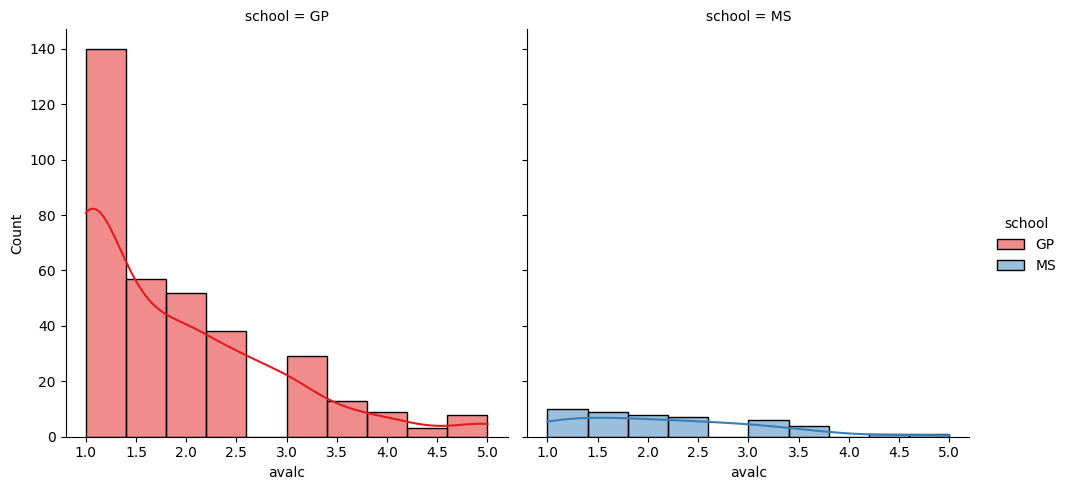

In [397]:
sns.displot(data=df, x="avalc", col="school", palette="Set1", hue="school", kde=True)

<h3>Alcohol consumption at school GP is higher than at school MS, so let us consider the school GP<h3>

<h3>The second hypothesis:<h3>
<h3>Romantic relationships influence the grades of students who wants to pursue higher education in the future more than alcohol consumption. Let's check it<h3>

<Axes: xlabel='romantic', ylabel='change'>

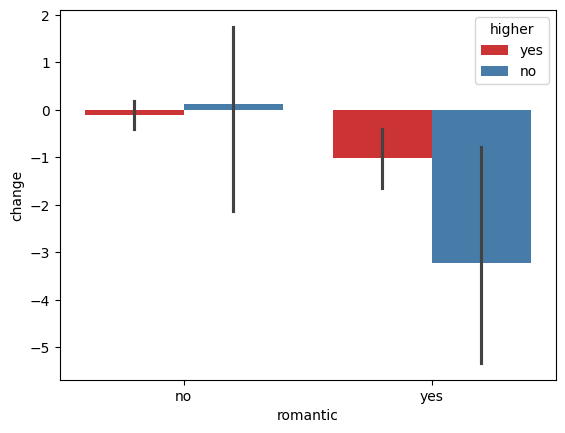

In [398]:
sns.barplot(GP_df, 
            x='romantic', 
            y='change', 
            hue='higher', 
            palette="Set1")

<h3>We can see that the negative trend in grades was for those students who were in romantic relationships<h3>

<Axes: xlabel='avalc', ylabel='change'>

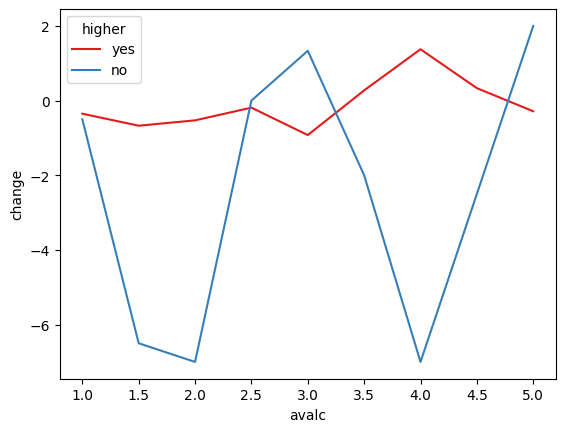

In [399]:
sns.lineplot(GP_df, x='avalc', 
             y='change', 
             hue='higher', 
             palette="Set1", 
             errorbar=None)

<h3>We can see that for those students who aspire to higher education, grades are not affected by the amount of alcohol consumed. Even for those students who do not seek higher education, at the highest alcohol consumption level of 5.0, grades increased dramatically<h3>